In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
dataTrain = pd.read_csv("preparedData.csv")
X_test = pd.read_csv("data/application_test.csv")

In [3]:
dataTrain = dataTrain.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [4]:
dTCols = dataTrain.columns.tolist()

In [5]:
dTCols

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_

In [6]:
dTCols = dTCols[:1] + dTCols[2:]


In [7]:
X_test = X_test[dTCols]

In [8]:
len(X_test.columns)

72

In [9]:
len(dataTrain.columns)

73

Applying OHE for categorical values

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
#all columns of type object
to_encode = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']

In [12]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

OHE for dataTrain

In [13]:
dataTrainEncoddedCategorical = ohe.fit_transform(dataTrain[to_encode])
dataTrainCategorical = pd.DataFrame(dataTrainEncoddedCategorical, columns=ohe.get_feature_names_out(to_encode))
dataTrainEnc = pd.concat([dataTrain.drop(columns=to_encode), dataTrainCategorical], axis=1)

NaN problem in test data

In [14]:
import matplotlib.pyplot as plt

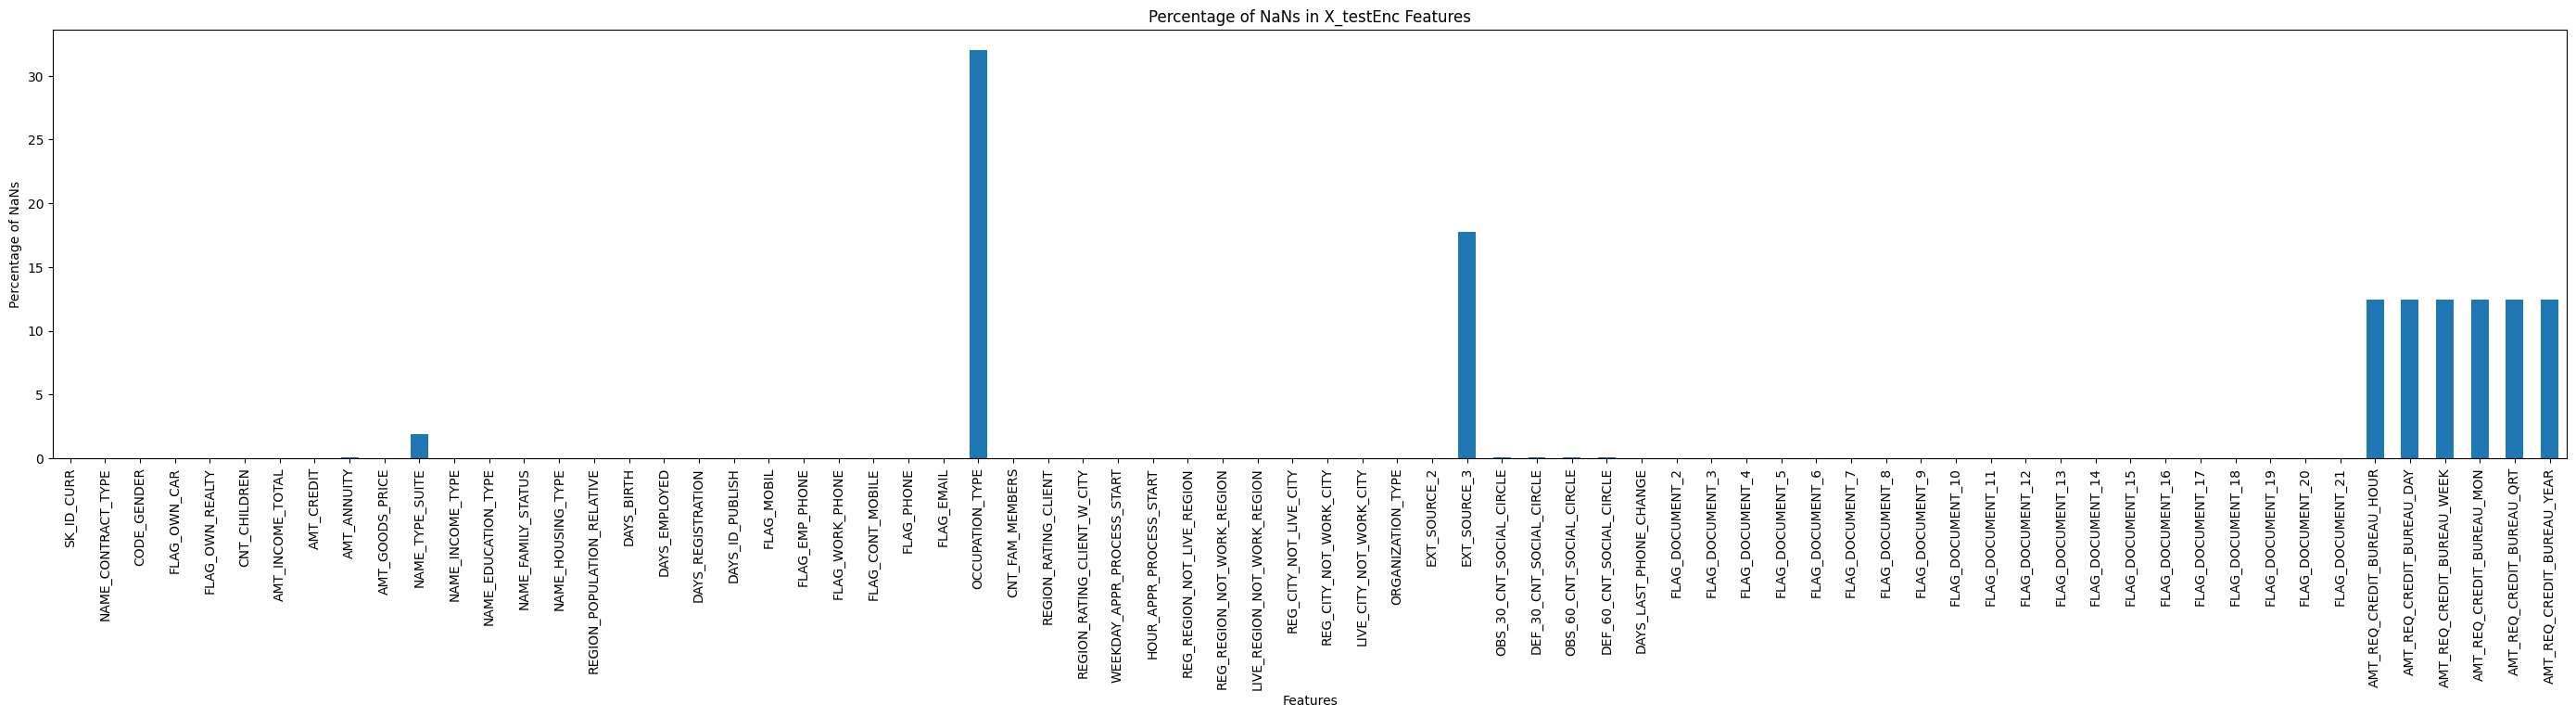

In [15]:
nan_percentage = (X_test.isnull().sum() / len(X_test)) * 100
nan_percentage.plot(kind='bar', figsize=(35, 6))
plt.title('Percentage of NaNs in X_testEnc Features')
plt.xlabel('Features')
plt.ylabel('Percentage of NaNs')
plt.show()

In [16]:
def assign_occupation(row):
    if row.OCCUPATION_TYPE == row.OCCUPATION_TYPE:
        return row.OCCUPATION_TYPE
    elif row.NAME_INCOME_TYPE in ['Pensioner', 'Unemployed', 'Student', 'Maternity leave']:
        return 'Not working'
    elif row.NAME_INCOME_TYPE in ['Working', 'Commercial associate']:
        return 'Working'
    elif row.NAME_INCOME_TYPE in ['State servant' 'Businessman']:
        return 'Core staff'
    else:
        return np.NaN
    
X_test['OCCUPATION_TYPE'] = X_test.apply(assign_occupation, axis=1)

In [17]:
bureau_columns = ['AMT_REQ_CREDIT_BUREAU_HOUR', 
                      'AMT_REQ_CREDIT_BUREAU_DAY',
                        'AMT_REQ_CREDIT_BUREAU_WEEK', 
                        'AMT_REQ_CREDIT_BUREAU_MON', 
                        'AMT_REQ_CREDIT_BUREAU_QRT',
                        'AMT_REQ_CREDIT_BUREAU_YEAR']

X_test[bureau_columns] = X_test[bureau_columns].fillna(0)

In [18]:
mean_val = X_test['EXT_SOURCE_3'].mean()
X_test['EXT_SOURCE_3'] = X_test['EXT_SOURCE_3'].fillna(mean_val)

In [19]:
X_test.dropna(inplace=True)

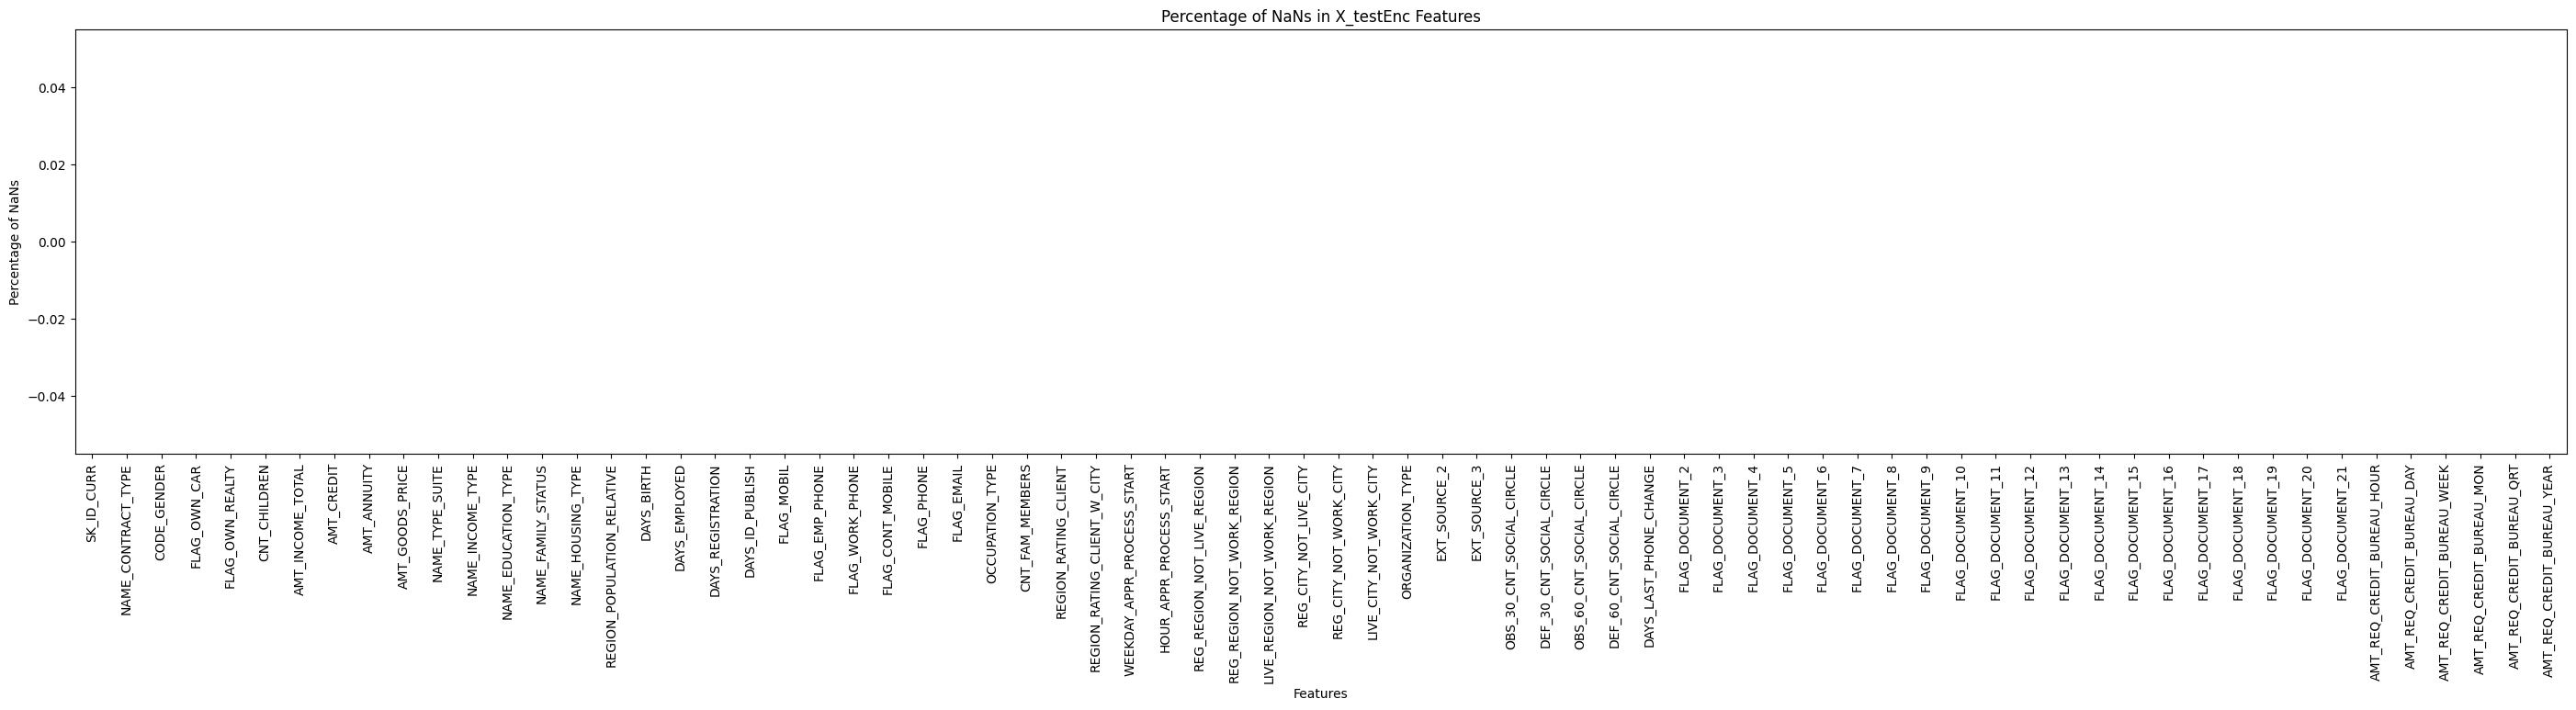

In [20]:
nan_percentage = (X_test.isnull().sum() / len(X_test)) * 100
nan_percentage.plot(kind='bar', figsize=(35, 6))
plt.title('Percentage of NaNs in X_testEnc Features')
plt.xlabel('Features')
plt.ylabel('Percentage of NaNs')
plt.show()

OHE for X_test

In [21]:
X_testEncoddedCategorical = ohe.fit_transform(X_test[to_encode])
X_testCategorical = pd.DataFrame(X_testEncoddedCategorical, columns=ohe.get_feature_names_out(to_encode))
X_testEnc = pd.concat([X_test.drop(columns=to_encode), X_testCategorical], axis=1)

In [22]:
X_testEnc

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100001.0,0.0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241.0,-2329.0,-5170.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005.0,0.0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064.0,-4469.0,-9118.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100028.0,2.0,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976.0,-1866.0,-2000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100038.0,1.0,180000.0,625500.0,32067.0,625500.0,0.010032,-13040.0,-2191.0,-4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100042.0,0.0,270000.0,959688.0,34600.5,810000.0,0.025164,-18604.0,-12009.0,-6116.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
47028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
47070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
47122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
dataTrainEnc.head(10)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941,-1588,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,100009,0,1,171000.0,1560726.0,41301.0,1395000.0,0.035792,-13778,-3130,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,100010,0,0,360000.0,1530000.0,42075.0,1530000.0,0.003122,-18850,-449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,0,112500.0,1019610.0,33826.5,913500.0,0.018634,-20099,365243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,0,135000.0,405000.0,20250.0,405000.0,0.019689,-14469,-2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
X_testEnc.head(10)

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100001.0,0.0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241.0,-2329.0,-5170.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005.0,0.0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064.0,-4469.0,-9118.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100028.0,2.0,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976.0,-1866.0,-2000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100038.0,1.0,180000.0,625500.0,32067.0,625500.0,0.010032,-13040.0,-2191.0,-4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100042.0,0.0,270000.0,959688.0,34600.5,810000.0,0.025164,-18604.0,-12009.0,-6116.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,100057.0,2.0,180000.0,499221.0,22117.5,373500.0,0.022800,-16685.0,-2580.0,-10125.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,100065.0,0.0,166500.0,180000.0,14220.0,180000.0,0.005144,-9516.0,-1387.0,-5063.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,100066.0,0.0,315000.0,364896.0,28957.5,315000.0,0.046220,-12744.0,-1013.0,-1686.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,100067.0,1.0,162000.0,45000.0,5337.0,45000.0,0.018634,-10395.0,-2625.0,-8124.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10,100074.0,0.0,67500.0,675000.0,25447.5,675000.0,0.003122,-23670.0,365243.0,-7490.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Here I found out that after OHE some columns from train df are not presented in test and vice versa. There are some nan values or some dropped columns so we can remove them.

In [25]:
# Only target must be here 
columns_not_in_test = [col for col in dataTrainEnc.columns if col not in X_testEnc.columns]
columns_not_in_test

['TARGET',
 'CODE_GENDER_XNA',
 'NAME_INCOME_TYPE_Businessman',
 'NAME_INCOME_TYPE_Maternity leave',
 'NAME_INCOME_TYPE_Unemployed']

In [26]:
dataTrainEnc = dataTrainEnc.drop(columns=[ 'CODE_GENDER_XNA',
 'NAME_INCOME_TYPE_Businessman',
 'NAME_INCOME_TYPE_Maternity leave',
 'NAME_INCOME_TYPE_Unemployed'])

In [27]:
columns_not_in_train = [col for col in X_testEnc.columns if col not in dataTrainEnc.columns]
columns_not_in_train

[]

In [28]:
X_testEnc = X_testEnc.drop(columns=columns_not_in_train)

In [29]:
X_testEnc

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100001.0,0.0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241.0,-2329.0,-5170.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005.0,0.0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064.0,-4469.0,-9118.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100028.0,2.0,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976.0,-1866.0,-2000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100038.0,1.0,180000.0,625500.0,32067.0,625500.0,0.010032,-13040.0,-2191.0,-4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100042.0,0.0,270000.0,959688.0,34600.5,810000.0,0.025164,-18604.0,-12009.0,-6116.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
47028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
47070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
47122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
X_testEnc = X_testEnc.dropna()

1. Logistic model

In [92]:
from sklearn.linear_model import LogisticRegression


In [33]:
dataTrainEnc = dataTrainEnc.rename(columns = lambda x:re.sub('[^A-Za-z0-9]+', '', x))

In [35]:
X_train = dataTrainEnc.drop(columns=['TARGET'])
y_train = dataTrainEnc['TARGET']

In [94]:
len(X_train.columns)

181

In [95]:
len(X_testEnc.columns)

181

In [97]:
logistic_model = LogisticRegression(random_state = 42)


2. Support Vector Classifier

In [98]:
from sklearn.svm import SVC

In [99]:
svc_model = SVC(kernel='linear', C = 1.0, max_iter=100, random_state = 42)

3. Decision tree

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
dt_model = DecisionTreeClassifier(random_state = 42)

4. Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)

5. Adaptive Boosting

In [104]:
from sklearn.ensemble import AdaBoostClassifier

In [105]:
ada_model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)

6. Gradient Boosting

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

In [107]:
gb_model = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=42)

7. CatBoost (framework of gradient boosting for solving the problem of losing the relationships between categories in categorical variables)

In [108]:
#pip install catboost

In [109]:
#from catboost import CatBoostClassifier, cv, Pool

In [110]:
#cb_model = CatBoostRegressor(iterations=100, max_depth=5, learning_rate=0.05, random_seed=1066, logging_level='Silent')

8. XGBoost

In [36]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import xgboost as xgb
from sklearn.metrics import make_scorer, roc_auc_score 

In [112]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)

In [113]:
parameters = {'max_depth' : 3, 
              'objective' : 'binary:logistic',
              'eval_metric' : 'error'}

In [114]:
xgb_model = XGBClassifier(**parameters)

In [115]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [116]:
r_a = make_scorer(roc_auc_score)
scores = cross_val_score(xgb_model, X_train, y_train, cv=cv, scoring=r_a)

In [117]:
xgb_score = scores.mean()

9. LightGBM

In [121]:
#pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\roman\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [37]:
import lightgbm as lgb

In [38]:
params = {
    'boosting_type': 'gbdt',  
    'objective': 'binary',  
    'metric': 'auc',  
    'num_leaves': 31,  
    'learning_rate': 0.05,  
    'feature_fraction': 0.9,  
    'bagging_fraction': 0.8,  
    'bagging_freq': 5,  
    'verbose': 0 
}


In [39]:
lgb_model = lgb.LGBMClassifier(**params)

In [40]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [41]:
r_a = make_scorer(roc_auc_score)
scores = cross_val_score(lgb_model, X_train, y_train, cv=cv, scoring=r_a)
scores

c:\Users\roman\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\roman\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 

array([0.50302303, 0.50381604, 0.50385307, 0.50404844, 0.50296035])

In [42]:
cv_scores_lgb = scores.mean()
cv_scores_lgb

0.5035401861810037

Cross validation on different default models

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_scores_logistic = cross_val_score(logistic_model, X_train, y_train, cv=5, scoring='roc_auc')

c:\Users\roman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\roman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [ ]:
print("CV Scores:", cv_scores_logistic)
print("ROC_AUC Mean:", cv_scores_logistic.mean())

CV Scores: [0.62201526 0.61851241 0.62104726 0.61847727 0.6240128 ]
ROC_AUC Mean: 0.6208129998387542


In [ ]:
#pip install openpyxl

In [44]:
import openpyxl

In [ ]:

workbook = openpyxl.load_workbook(r"C:\Users\roman\Desktop\output.xlsx")

cv_str = ' '.join(map(str, cv_scores_logistic))
sheet = workbook.active

sheet['A2'] = cv_str
sheet['A3'] = cv_scores_logistic.mean()


workbook.save(r"C:\Users\roman\Desktop\output.xlsx")


In [ ]:
cv_scores_svc = cross_val_score(svc_model, X_train, y_train, cv=5, scoring='roc_auc')


c:\Users\roman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\roman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\roman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\roman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users

In [ ]:
print("CV Scores:", cv_scores_svc)
print("ROC_AUC Mean:", cv_scores_svc.mean())

CV Scores: [0.51725917 0.50576472 0.5070968  0.48183631 0.47656517]
ROC_AUC Mean: 0.49770443450519253


In [ ]:
workbook = openpyxl.load_workbook(r"C:\Users\roman\Desktop\output.xlsx")

cv_str = ' '.join(map(str, cv_scores_svc))
sheet = workbook.active

sheet['B2'] = cv_str
sheet['B3'] = cv_scores_svc.mean()


workbook.save(r"C:\Users\roman\Desktop\output.xlsx")

In [ ]:
cv_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='roc_auc')


In [ ]:
print("CV Scores:", cv_scores_dt)
print("ROC_AUC Mean:", cv_scores_dt.mean())

CV Scores: [0.546799   0.53637971 0.53524276 0.5371512  0.54066036]
ROC_AUC Mean: 0.5392466038177998


In [ ]:
workbook = openpyxl.load_workbook(r"C:\Users\roman\Desktop\output.xlsx")

cv_str = ' '.join(map(str, cv_scores_dt))
sheet = workbook.active

sheet['C2'] = cv_str
sheet['C3'] = cv_scores_dt.mean()


workbook.save(r"C:\Users\roman\Desktop\output.xlsx")

In [ ]:
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='roc_auc')

In [ ]:
print("CV Scores:", cv_scores_rf)
print("ROC_AUC Mean:", cv_scores_rf.mean())

CV Scores: [0.69581659 0.70161316 0.69136592 0.69456785 0.69108351]
ROC_AUC Mean: 0.6948894038019008


In [ ]:
workbook = openpyxl.load_workbook(r"C:\Users\roman\Desktop\output.xlsx")

cv_str = ' '.join(map(str, cv_scores_rf))
sheet = workbook.active

sheet['D2'] = cv_str
sheet['D3'] = cv_scores_rf.mean()


workbook.save(r"C:\Users\roman\Desktop\output.xlsx")

In [ ]:
cv_scores_ada = cross_val_score(ada_model, X_train, y_train, cv=5, scoring='roc_auc')


c:\Users\roman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\roman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\roman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\roman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is 

In [ ]:
print("CV Scores:", cv_scores_ada)
print("ROC_AUC Mean:", cv_scores_ada.mean())

CV Scores: [0.73948248 0.73886316 0.73654683 0.74141207 0.74033567]
ROC_AUC Mean: 0.7393280430191161


In [ ]:
workbook = openpyxl.load_workbook(r"C:\Users\roman\Desktop\output.xlsx")

cv_str = ' '.join(map(str, cv_scores_ada))
sheet = workbook.active

sheet['E2'] = cv_str
sheet['E3'] = cv_scores_ada.mean()


workbook.save(r"C:\Users\roman\Desktop\output.xlsx")

In [ ]:
cv_scores_grad = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='roc_auc')

In [ ]:
print("CV Scores:", cv_scores_grad)
print("ROC_AUC Mean:", cv_scores_grad.mean())

CV Scores: [0.73842112 0.73942247 0.73602354 0.74174047 0.74097985]
ROC_AUC Mean: 0.7393174888244276


In [ ]:
workbook = openpyxl.load_workbook(r"C:\Users\roman\Desktop\output.xlsx")

cv_str = ' '.join(map(str, cv_scores_grad))
sheet = workbook.active

sheet['F2'] = cv_str
sheet['F3'] = cv_scores_grad.mean()


workbook.save(r"C:\Users\roman\Desktop\output.xlsx")

In [ ]:
#cv_scores_cat = cv(Pool(X_train, y_train))

In [120]:
workbook = openpyxl.load_workbook(r"C:\Users\roman\Desktop\output.xlsx")
sheet = workbook.active

sheet['H3'] = xgb_score


workbook.save(r"C:\Users\roman\Desktop\output.xlsx")

In [47]:
workbook = openpyxl.load_workbook(r"C:\Users\roman\Desktop\output.xlsx")
sheet = workbook.active

sheet['I3'] = cv_scores_lgb


workbook.save(r"C:\Users\roman\Desktop\output.xlsx")